# Import of librairies 

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from pprint import pprint
import csv


# Loading of librairies

In [3]:
try:
    df1 = pd.read_csv('/Users/jordangac/Documents/M1/Introduction_to_Big_Data/ProjetBIGDATA/consommation-electrique-par-secteur-dactivite-commune.csv', sep=';', engine='python', encoding='UTF-8')
    df2 = pd.read_csv('/Users/jordangac/Documents/M1/Introduction_to_Big_Data/ProjetBIGDATA/enquetes-gares-connexions-repartition-repartition-par-classe-dage.csv', sep=';', engine='python', encoding='UTF-8') 

except (csv.Error):
    pprint("Error during the file loading")

# Sources of datasets 
# https://www.europeandataportal.eu/data/fr/dataset/repartition-des-clients-par-age-enquetes-en-gare
# https://data.enedis.fr/explore/dataset/consommation-electrique-par-secteur-dactivite-commune/

# Working with first dataset from ENEDIS

In [4]:
# Printing information from first dataset 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201963 entries, 0 to 201962
Data columns (total 43 columns):
Année                                     201963 non-null int64
Nom commune                               201963 non-null object
Code commune                              201963 non-null int64
Nom EPCI                                  201963 non-null object
Code EPCI                                 201963 non-null object
Type EPCI                                 201963 non-null object
Nom département                           201963 non-null object
Code département                          201963 non-null int64
Nom région                                201963 non-null object
Code région                               201963 non-null int64
Nb sites Résidentiel                      174131 non-null float64
Conso totale Résidentiel (MWh)            174131 non-null float64
Conso moyenne Résidentiel (MWh)           174131 non-null float64
Nb sites Professionnel                    174

# Dropping French regions which are not near the sea exclusion of Ile-de-France

In [5]:
to_del = df1[df1['Nom région'].isin(['Grand-Est', 'Centre-Val de Loire', 'Bourgogne-Franche-Comté', 'Auvergne-Rhône-Alpes'])].index.tolist() 
df1 = df1.drop(to_del)
df1

Année                    Nom commune  Code commune  \
4        2016                          Seyre         31546   
8        2015                         Aulnoy         77013   
9        2012                Causse-et-Diège         12257   
11       2016             Gensac-de-Boulogne         31218   
12       2016                       Senlisse         78590   
13       2012                         Unzent          9319   
16       2013                        Arthezé         72009   
17       2013                       Langouet         35146   
18       2014              Neuilly-le-Vendin         53164   
20       2014                    Ousse-Suzan         40215   
22       2012             Graves-Saint-Amant         16297   
25       2016            Beauvais-sur-Tescou         81024   
26       2012                   Coursegoules          6050   
27       2013                  Graimbouville         76314   
29       2015                           Ossé         35209   
31       2011                         Larzac         24230   
34       2015             Rémalard en Perche         61345   
37       2011        Saint-Léger-en-Yvelines         78562   
38       2013                  Saint-Clément         30244   
39       2015  Bors (Canton de Charente-Sud)         16053   
40       2011                   Sainte-Marie         35294   
41       2012               Saint-Symphorien         35317   
42       2011                        Roussac         87128   
44       2014              L'Hôpital-d'Orion         64263   
45       2013                        Plesder         35225   
47       2013            Verneuil-sur-Vienne         87201   
48       2016                        Sardent         23168   
51       2016                   Montainville         78415   
52       2014                       Blaziert         32057   
53       2015                        Gourbit          9136   
...       ...                            ...           ...   
201909   2014                        Quinsac         33349   
201910   2016                  Saint-Maixent         72296   
201911   2015                Neuvy-au-Houlme         61308   
201918   2016                      Clasville         76176   
201919   2015                        Centrès         12065   
201920   2011                         Pisany         17278   
201921   2015            Buigny-lès-Gamaches         80148   
201923   2011                  Saint-Sauveur         33471   
201924   2012               Miraval-Cabardès         11232   
201928   2011                       Argentré         53007   
201929   2013                          Séron         65422   
201932   2011                          Gémil         31216   
201934   2016       Saint-André-de-Valborgne         30231   
201935   2012                         Hoedic         56085   
201936   2011                  La Daguenière         49117   
201938   2013                       Godisson         61192   
201939   2015                      Fouzilhon         34105   
201940   2015                       Étainhus         76250   
201942   2014                    Longperrier         77259   
201943   2014                   Les Genettes         61187   
201948   2011               Cauville-sur-Mer         76167   
201950   2013                          Sauve         30311   
201951   2016                  Criel-sur-Mer         76192   
201953   2014       La Villeneuve-en-Chevrie         78668   
201955   2011                       Écharcon         91204   
201956   2012                  Perdreauville         78484   
201958   2011                       Plumelec         56172   
201959   2014                Condé-sur-Risle         27167   
201961   2011           Saint-Mamert-du-Gard         30281   
201962   2015           Le Hommet-d'Arthenay         50248   

                                         Nom EPCI  Code EPCI Type EPCI  \
4       CC Coteaux du Lauragais Sud (Co.Laur.Sud)  243100179        CC   
8              

# Mean of the professional electric consumption by region 

In [7]:
df_groupby_region_mean = df1.groupby('Nom région').mean()

df_sorted_profelec = df_groupby_region_mean.sort_values('Conso totale Professionnel (MWh)', ascending=False)

df_sorted_profelec

Année  Code commune  Code département  \
Nom région                                                                
Île-de-France               2013.498774  83628.226567         83.348229   
Provence-Alpes-Côte d'Azur  2013.497817  31056.088559         30.967336   
Bretagne                    2013.492431  34336.051599         34.167040   
Pays de la Loire            2013.461958  61781.769589         61.619237   
Nouvelle Aquitaine          2013.496826  36154.476215         35.932792   
Hauts-de-France             2013.498604  52374.210924         51.971166   
Occitanie                   2013.495503  39277.056742         39.080354   
Normandie                   2013.455853  45393.808292         45.048256   

                            Code région  Nb sites Résidentiel  \
Nom région                                                      
Île-de-France                      11.0           4075.665579   
Provence-Alpes-Côte d'Azur         93.0           2394.058942   
Bretagne                           53.0           1168.500410   
Pays de la Loire                   52.0           1067.363506   
Nouvelle Aquitaine                 75.0            691.400950   
Hauts-de-France                    32.0            647.627964   
Occitanie                          76.0            617.664129   
Normandie                          28.0            440.720916   

                            Conso totale Résidentiel (MWh)  \
Nom région                                                   
Île-de-France                                 16691.566953   
Provence-Alpes-Côte d'Azur                    12327.458260   
Bretagne                                       5947.758330   
Pays de la Loire                               5808.718523   
Nouvelle Aquitaine                             3563.878442   
Hauts-de-France                                3300.960210   
Occitanie                                      3158.649354   
Normandie                                      2602.477562   

                            Conso moyenne Résidentiel (MWh)  \
Nom région                                                    
Île-de-France                                      7.457462   
Provence-Alpes-Côte d'Azur                         5.789510   
Bretagne                                           5.802273   
Pays de la Loire                                   6.666848   
Nouvelle Aquitaine                                 6.000719   
Hauts-de-France                                    6.507248   
Occitanie                                          5.559090   
Normandie                                          6.951751   

                            Nb sites Professionnel  \
Nom région                                           
Île-de-France                           564.358640   
Provence-Alpes-Côte d'Azur              351.975979   
Bretagne                                155.106255   
Pays de la Loire                        139.729040   
Nouvelle Aquitaine                      103.800194   
Hauts-de-France                          79.086719   
Occitanie                                90.940333   
Normandie                                59.875572   

                            Conso totale Professionnel (MWh)  \
Nom région                                                     
Île-de-France                                    5653.952899   
Provence-Alpes-Côte d'Azur                       3289.771247   
Bretagne                                         1712.850678   
Pays de la Loire                                 1499.846401   
Nouvelle Aquitaine                                923.238245   
Hauts-de-France                                   856.006791   
Occitanie                                         835.816803   
Normandie                                         645.182225   

                            Conso moyenne Professionnel (MWh)  \
Nom région                                                      
Île-de-France                                       10.998360   
Pro

# Plotting the mean of professional consumption by region 

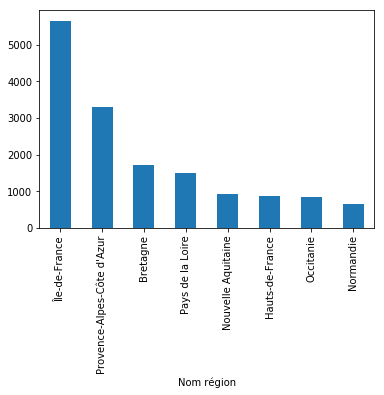

In [8]:
df_sorted_profelec['Conso totale Professionnel (MWh)'].plot(kind='bar')
plt.show()

# Sum of the number of residential sites by region 

In [9]:
df_groupby_region_mean_nbres = df1.groupby('Nom région').sum()

df_sorted_nbres = df_groupby_region_mean_nbres.sort_values('Nb sites Résidentiel', ascending=False)

pprint(df_sorted_nbres['Nb sites Résidentiel'])

Nom région
Île-de-France                 23728525.0
Nouvelle Aquitaine            14997178.0
Occitanie                     13875207.0
Provence-Alpes-Côte d'Azur    11860168.0
Hauts-de-France               10569936.0
Pays de la Loire               8949843.0
Bretagne                       8555760.0
Normandie                      7027295.0
Name: Nb sites Résidentiel, dtype: float64


# Plotting the sum of number of residential sites by region

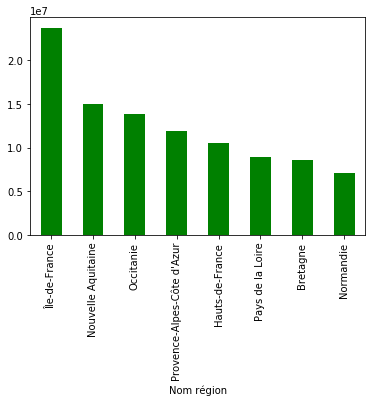

In [10]:
%matplotlib inline 

color = 'green'
df_sorted_nbres['Nb sites Résidentiel'].plot(kind='bar', stacked =True, color=color)

plt.show()

# Working from the second dataset from http://europeandataportal.eu

                           UIC  Pourcentage        Année
Classe d'âge                                            
20 ans à 29 ans  463595.586207    23.948475  2013.932203
Non communiqué   429783.619048    16.448571  2012.523810
30 ans à 39 ans  463595.586207    15.160508  2013.932203
40 ans à 49 ans  463595.586207    15.086949  2013.932203
50 ans à 59 ans  463595.586207    14.104407  2013.932203
60 ans et plus   463595.586207    14.064576  2013.932203
19 ans et moins  463595.586207    13.469661  2013.932203


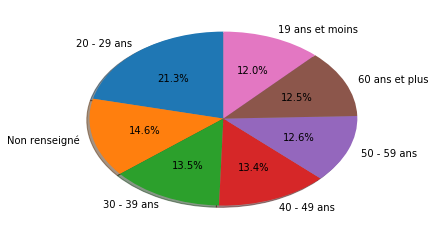

In [11]:
df_ageRange = df2.groupby("Classe d'âge").mean()

df_sorted_ageRange = df_ageRange.sort_values('Pourcentage', ascending=False)

liste_ageRange = df_sorted_ageRange['Pourcentage'].tolist()
labels = '20 - 29 ans', 'Non renseigné', '30 - 39 ans', '40 - 49 ans', '50 - 59 ans', '60 ans et plus', '19 ans et moins' # Have entered manually because of encoding problems

plt.pie(liste_ageRange, labels=labels, shadow=True, autopct='%1.1f%%', startangle=90)
plt.axis('on')
pprint(df_sorted_ageRange)

# Sorting and plotting the area apartment

Nom région
Provence-Alpes-Côte d'Azur    13.246303
Île-de-France                 10.502417
Bretagne                       8.655638
Normandie                      7.033325
Occitanie                      7.005608
Hauts-de-France                6.846224
Pays de la Loire               6.439262
Nouvelle Aquitaine             5.624931
Name: Superficie des logements 40 à 60 m2, dtype: float64


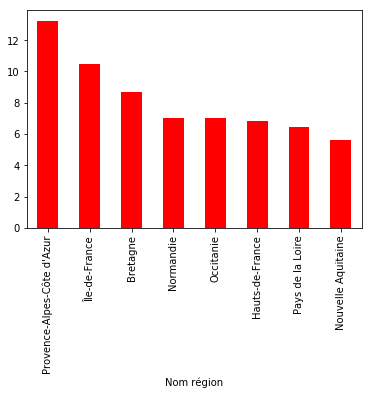

In [14]:

df_sorted_areaApart = df_groupby_region_mean.sort_values('Superficie des logements 40 à 60 m2', ascending=False)
print(df_sorted_areaApart['Superficie des logements 40 à 60 m2'])
df_sorted_areaApart['Superficie des logements 40 à 60 m2'].plot(kind='bar', color = 'red')


# The Ranker Dataset 

In [15]:
# Creation of ranking dataframe #

liste_region = df1['Nom région'].drop_duplicates().tolist()
liste_region.sort()
rank_array = [3,6,8,5,7,4,2,1]
df_ranking = pd.DataFrame(rank_array, index= liste_region, columns=['Rank conso pro'])
rank_array2 = [7,5,8,2,3,6,4,1]
rank_array3 = [3,6,4,8,5,7,1,2]
df_ranking['Rank nb residential'] = rank_array2
df_ranking['Rank area apartment'] = rank_array3

# Creating fonction to attribute points for each region #
liste_points = [10, 8, 6, 5, 4, 3, 2, 1]
new_ranking = df_ranking.sort_values('Rank conso pro', ascending=True)
new_ranking['Points by rank'] = liste_points
total_points = [28, 23, 14, 10, 13, 10, 12, 7]
new_ranking['Total points'] = total_points

new_ranking['Final rank'] = new_ranking['Total points'].rank(ascending=False)
final_ranking = new_ranking.sort_values('Final rank', ascending=True)

final_ranking

Rank conso pro  Rank nb residential  \
Île-de-France                            1                    1   
Provence-Alpes-Côte d'Azur               2                    4   
Bretagne                                 3                    7   
Nouvelle Aquitaine                       5                    2   
Occitanie                                7                    3   
Pays de la Loire                         4                    6   
Hauts-de-France                          6                    5   
Normandie                                8                    8   

                            Rank area apartment  Points by rank  Total points  \
Île-de-France                                 2              10            28   
Provence-Alpes-Côte d'Azur                    1               8            23   
Bretagne                                      3               6            14   
Nouvelle Aquitaine                            8               4            13   
Occitanie                                     5               2            12   
Pays de la Loire                              7               5            10   
Hauts-de-France                               6               3            10   
Normandie                                     4               1             7   

                            Final rank  
Île-de-France                      1.0  
Provence-Alpes-Côte d'Azur         2.0  
Bretagne                           3.0  
Nouvelle Aquitaine                 4.0  
Occitanie                          5.0  
Pays de la Loire                   6.5  
Hauts-de-France                    6.5  
Normandie                          8.0